# Wine quality prediction

In this notebook, First I have done some exploration on the data using matplotlib and seaborn. Then, I use different classifier models to predict the quality of the wine.

### Random Forest Classifier

Then I use cross validation evaluation technique to optimize the model performance.

### Grid Search CV

### Cross Validation Score

In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# loading the data
Dataframe = pd.read_csv("C:/atharv project/winequality-red.csv")
Dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# show rows and columns
Dataframe.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
Dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


lets do some plotting to know how data columns is distributed in dataset

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

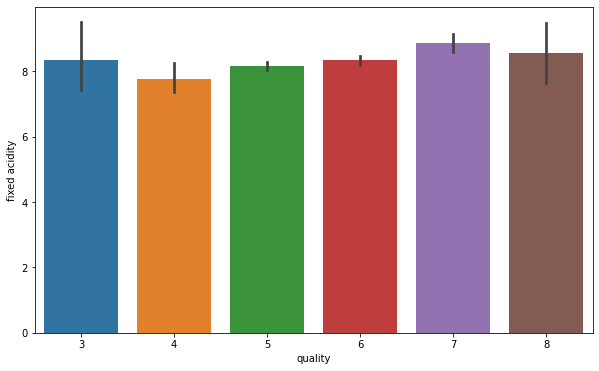

In [5]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = Dataframe)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

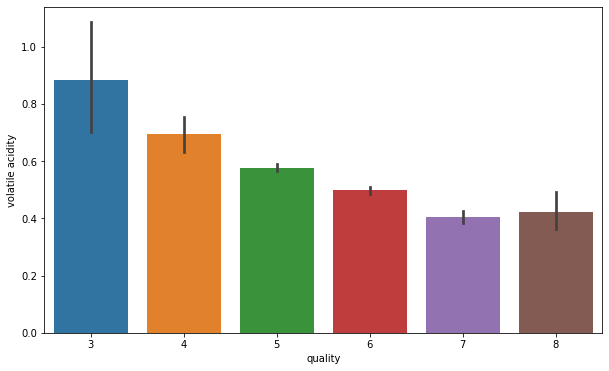

In [6]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = Dataframe)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

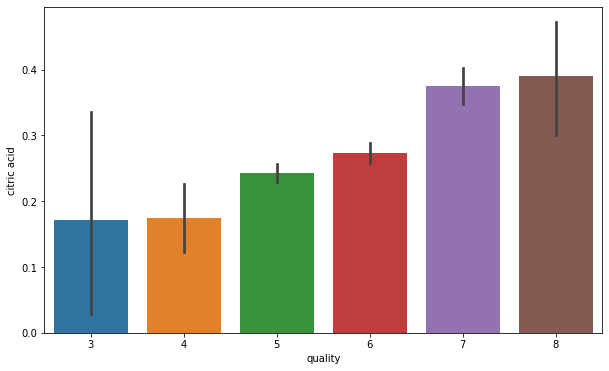

In [7]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = Dataframe)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

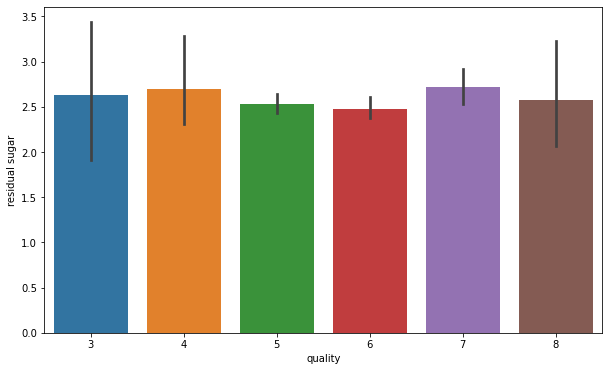

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = Dataframe)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

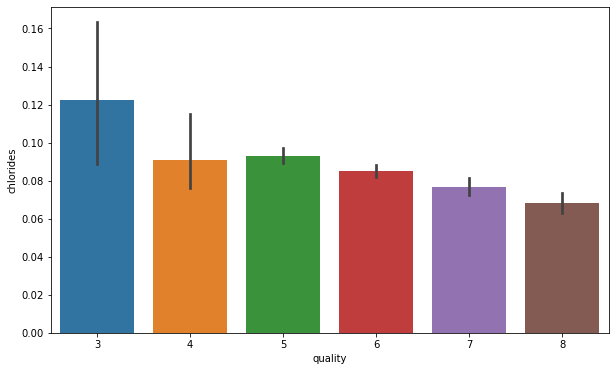

In [9]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = Dataframe)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

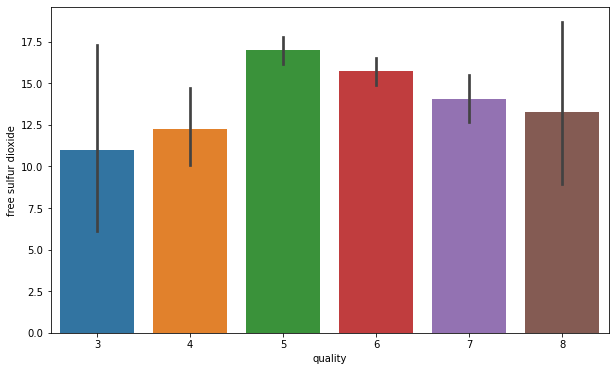

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = Dataframe)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

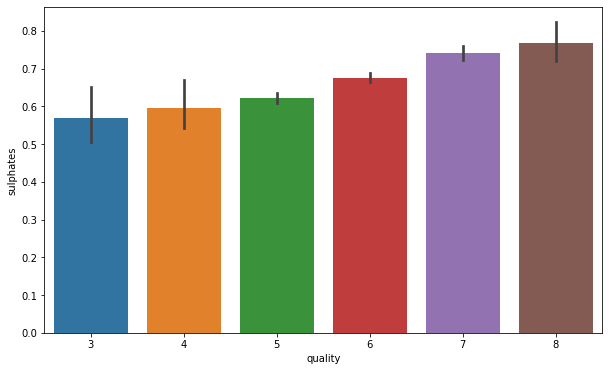

In [11]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = Dataframe)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

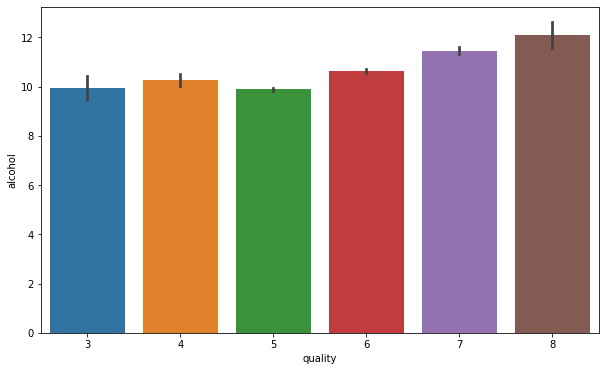

In [12]:
#Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = Dataframe)

Preprocessing data for performing Machine learning algorithms

In [13]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
Dataframe['quality'] = pd.cut(Dataframe['quality'], bins = bins, labels = group_names)

In [14]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [15]:
#Bad becomes 0 and good becomes 1 
Dataframe['quality'] = label_quality.fit_transform(Dataframe['quality'])

In [16]:
Dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [17]:
Dataframe['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\python_anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

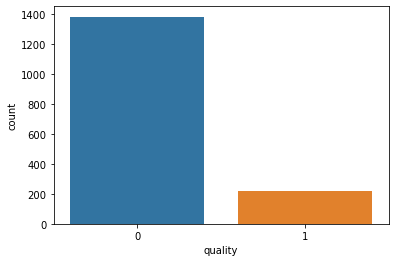

In [18]:
sns.countplot(Dataframe['quality'])

In [19]:
#Now seperate the dataset as response variable and feature variabes
X = Dataframe.drop('quality', axis = 1)
y = Dataframe['quality']

In [20]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [23]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [24]:
X_test

array([[-3.33991288e-01,  2.42581186e-01, -9.63136787e-01, ...,
        -4.42561113e-01,  6.34928030e-02, -7.55088351e-01],
       [-2.78643172e-01, -9.49230728e-02, -4.94583756e-01, ...,
         5.19964189e-01, -1.15964614e+00, -8.44713081e-01],
       [ 1.32645219e+00,  8.61338994e-01, -2.34276516e-01, ...,
        -1.85887699e-01,  2.23796204e+00, -4.86214161e-01],
       ...,
       [-1.90259149e-03,  4.67584025e-01, -7.80921719e-02, ...,
        -1.02007629e+00, -8.19885325e-01, -5.75838891e-01],
       [ 2.74837989e-01, -1.38868940e+00,  6.50768099e-01, ...,
        -1.02007629e+00,  2.67349294e-01,  6.78907330e-01],
       [ 4.40882337e-01,  1.39572074e+00, -1.17138258e+00, ...,
        -1.21719346e-01, -7.51933161e-01, -6.65463621e-01]])

#### Our training and testing data is ready now to perform machine learning algorithm

### Random Forest Classifier

In [25]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


In [26]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.86      0.88      0.87       320



Random forest gives the accuracy of 87%

In [27]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[262  11]
 [ 28  19]]


In [28]:
#Let's try to increase our accuracy of models
#Grid Search CV


In [29]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [30]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [31]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [32]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [33]:
#Best parameters for our svc model
grid_svc.best_params_#Best parameters for our svc model
grid_svc.best_params_


{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

### Cross Validation Score for random forest and SGD

In [34]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9140132874015748

Random forest accuracy increases from 87% to 91 % using cross validation score

In [35]:
### Create a Pickle file 
import pickle
pickle_out = open("Randomforest.pkl","wb")
pickle.dump(grid_svc, pickle_out)
pickle_out.close()